<a href="https://colab.research.google.com/github/shubhneet182/Mnist_CNN/blob/master/MNISTKerasCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 4.3MB 39.5MB/s 
     |████████████████████████████████| 501kB 43.6MB/s 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [4]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
randDisp = np.random.randint(0, X_train.shape[0], 9)
sample_digits = X_train[randDisp]
sample_labels = Y_train[randDisp]

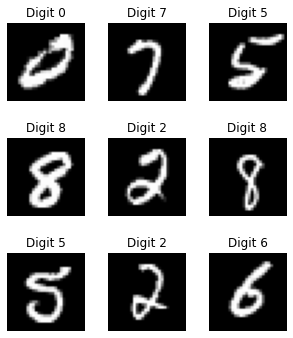

In [6]:
num_rows, num_cols = 3, 3
f, ax = plt.subplots(num_rows, num_cols, figsize=(5, 6), gridspec_kw={'wspace':0.3})

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 3 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('Digit %d' % sample_labels[image_index])
plt.show()
plt.close()

In [7]:
print (X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
X_train.max()

255

In [9]:
# rescaling
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train.max()

1.0

In [11]:
# reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
Y_train.shape

(60000,)

In [14]:
# one-hot-encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [15]:
#CNN Model

model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation= 'relu', input_shape = X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

In [16]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [17]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [18]:
train = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose= 1, validation_data= (X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 140s 298ms/step - loss: 0.2435 - accuracy: 0.9268 - val_loss: 0.0596 - val_accuracy: 0.9821
Epoch 2/10
469/469 [==============================] - 138s 294ms/step - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0375 - val_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.0334 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 138s 294ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0326 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 138s 294ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0286 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 137s 292ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0282 -

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027434775605797768
Test accuracy: 0.9914000034332275


In [26]:
model.save('mnist_cnn.h5', save_format='h5')

In [20]:
'''!mkdir -p saved_model
model.save('saved_model/my_model') '''

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
#tfjs.converters.save_keras_model(model, 'models')

In [22]:
#loaded_model = tf.keras.models.load_model('saved_model/my_model')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [23]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0274 - accuracy: 0.9914


[0.027434775605797768, 0.9914000034332275]

In [ ]:
train.history

{'accuracy': [0.92106664,
  0.9727,
  0.9802833,
  0.98403335,
  0.98511666,
  0.98803335,
  0.9892,
  0.9899333,
  0.9910167,
  0.99093336],
 'loss': [0.2583027526418368,
  0.08858630155523618,
  0.06620651497244835,
  0.053547790669401484,
  0.04668415516912937,
  0.0393960499510169,
  0.03492548702694476,
  0.031022936829427878,
  0.02845503964362045,
  0.02719401187871893],
 'val_accuracy': [0.9823,
  0.9874,
  0.9886,
  0.9904,
  0.9894,
  0.9914,
  0.9916,
  0.9914,
  0.9915,
  0.9922],
 'val_loss': [0.05496773189380765,
  0.038097603274323044,
  0.03387898194054142,
  0.02918543656463735,
  0.03177950165568618,
  0.026866472286335194,
  0.02803971523914952,
  0.027177663252608907,
  0.027057098200662585,
  0.02573777646227536]}

In [ ]:
def plot_learningCurve(train, epochs):
  #Plot training and validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, train.history['accuracy'])
  plt.plot(epoch_range, train.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  #Plot training and validation loss values
  plt.plot(epoch_range, train.history['loss'])
  plt.plot(epoch_range, train.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

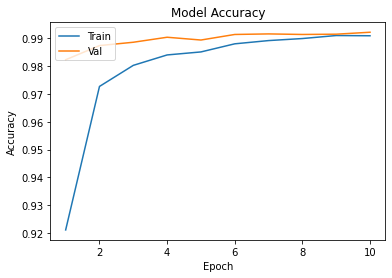

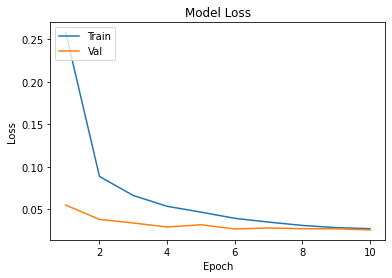

In [ ]:
plot_learningCurve(train, 10)

In [ ]:
# first 20 predictions
predictions = loaded_model.predict(X_test)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(Y_test,axis=1)[:25]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [ ]:
# No.of mismatches
(np.argmax(predictions, axis=1) != np.argmax(Y_test,axis=1)).sum()

78

In [ ]:
'''tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_node_names='MobilenetV1/Predictions/Reshape_1' \
    --saved_model_tags=serve \
    /mobilenet/saved_model \
    /mobilenet/web_model'''

"tensorflowjs_converter     --input_format=tf_saved_model     --output_node_names='MobilenetV1/Predictions/Reshape_1'     --saved_model_tags=serve     /mobilenet/saved_model     /mobilenet/web_model"